# Hierarchical Clustering (scipy / sklearn)

This notebook demonstrates hierarchical (agglomerative) clustering using `scipy` and `sklearn`. It includes dendrograms, linkage comparisons (single/complete/average/ward), flat cluster extraction, evaluation (silhouette, cophenetic correlation), and visualization on synthetic and Iris datasets. Designed for Colab — run cells sequentially.

# Install / notes (uncomment when running in Colab)
# !pip install scipy scikit-learn matplotlib seaborn umap-learn

print('If running in Colab, uncomment pip installs and mount Drive if you want to save outputs to Drive.')

In [4]:
# Imports and utilities
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs, load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster, cophenet
from scipy.spatial.distance import pdist
from sklearn.metrics import silhouette_score, adjusted_rand_score

sns.set(style='whitegrid')
print('Libraries imported')

Libraries imported


In [5]:
# Load datasets and preprocess
X_blob, y_blob = make_blobs(n_samples=400, centers=[[0,0],[3,3],[0,5]], cluster_std=[0.5,0.7,0.4], random_state=42)
X_blob_s = StandardScaler().fit_transform(X_blob)

iris = load_iris()
X_iris = StandardScaler().fit_transform(iris.data)
y_iris = iris.target

print('Datasets prepared')

Datasets prepared


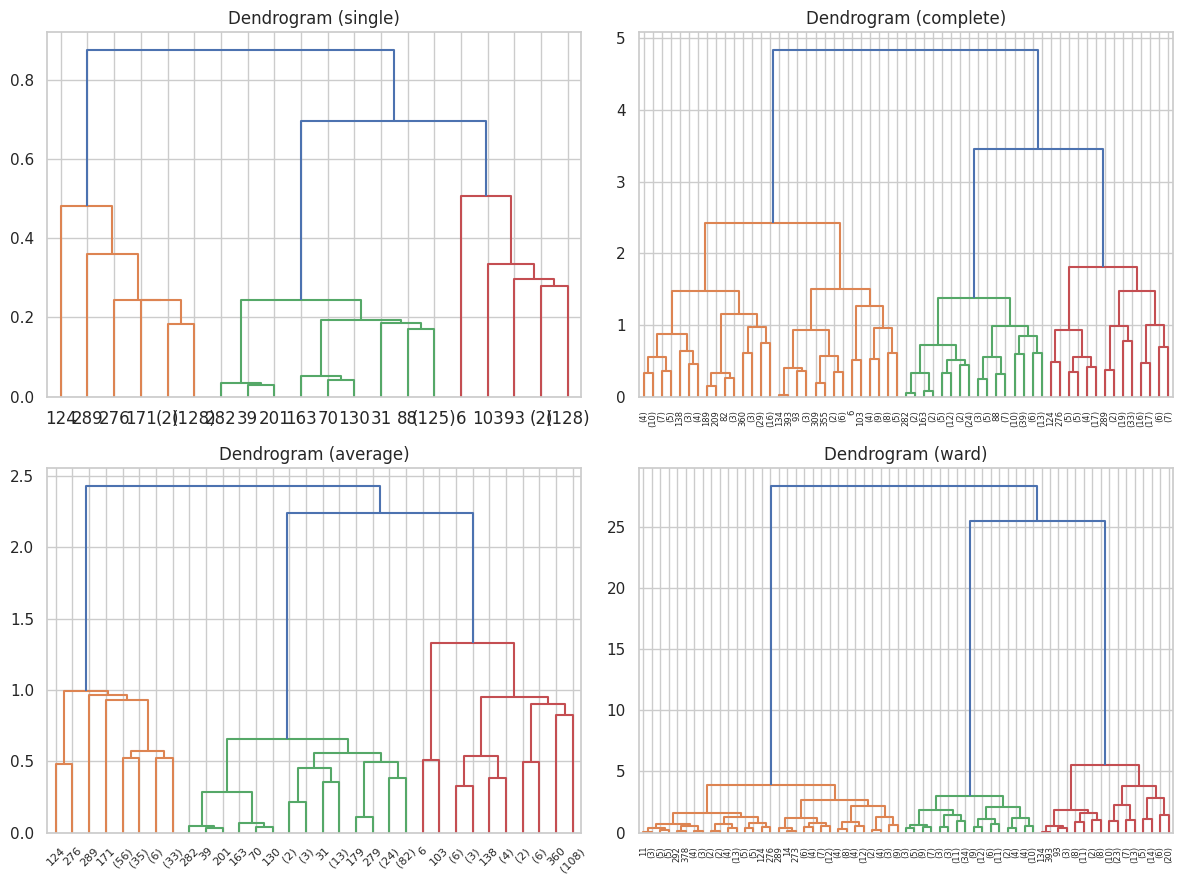

Cophenetic correlation coefficient (ward): 0.9129808536068524


In [6]:
# Compute linkage matrices and plot dendrograms for several methods
methods = ['single','complete','average','ward']
plt.figure(figsize=(12,9))
for i, method in enumerate(methods,1):
    plt.subplot(2,2,i)
    Z = linkage(X_blob_s, method=method)
    dendrogram(Z, truncate_mode='level', p=5)
    plt.title(f'Dendrogram ({method})')
plt.tight_layout()
plt.show()

# Cophenetic correlation for ward linkage
Z_ward = linkage(X_blob_s, method='ward')
coph_corr, coph_dists = cophenet(Z_ward, pdist(X_blob_s))
print('Cophenetic correlation coefficient (ward):', coph_corr)

In [7]:
# Extract flat clusters and evaluate (use AgglomerativeClustering for prediction)
for n_clusters in [2,3,4]:
    agg = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')
    labels = agg.fit_predict(X_blob_s)
    sil = silhouette_score(X_blob_s, labels)
    print(f'n_clusters={n_clusters}, silhouette={sil:.4f}')

# Compare to ground truth for Iris
agg_iris = AgglomerativeClustering(n_clusters=3, linkage='ward')
labels_iris = agg_iris.fit_predict(X_iris)
print('Iris ARI:', adjusted_rand_score(y_iris, labels_iris))


n_clusters=2, silhouette=0.5481
n_clusters=3, silhouette=0.7596
n_clusters=4, silhouette=0.6468
Iris ARI: 0.6153229932145449


In [8]:
# Save cluster labels example
pd.DataFrame({'x0': X_blob[:,0], 'x1': X_blob[:,1], 'cluster': labels}).to_csv('hierarchical_blob_clusters.csv', index=False)
print('Saved hierarchical_blob_clusters.csv')

Saved hierarchical_blob_clusters.csv
